# Does school funding impact students academic performance?

<img src=images/education-header.jpg width="800"/>


**Credit:**  [techxend](https://www.techxtend.com/site/content/education) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [61]:
# read file
df = pd.read_csv('20210101/final_merged.csv', index_col = 0)
df.head()

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
3120,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,White,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,1.0,2464.9,75.0,75.0,109.0,27.0,27.0,0.0,2.0,2.0,8.0,17.0
7379,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hawaiian Native/Pacific Islander,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Hispanic,1581.0,1.0,2.0,2431.3,100.0,100.0,110.0,36.0,36.0,0.0,0.0,0.0,2.0,34.0
8,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,2870.0,55795000.0,19440.77,Black,543.0,1.0,2.0,2403.7,115.0,115.0,157.0,45.0,45.0,0.0,0.0,0.0,0.0,45.0


In [3]:
# columns present on the dataset
df.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Mean Scale Score',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met'],
      dtype='object')

In [4]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['White', 'Hispanic', 'Hawaiian Native/Pacific Islander', 'Black',
       'Asian or Pacific Islander', 'Two or More Races',
       'American Indian/Alaska Native', 'Filipino'], dtype=object)

In [5]:
# filtering for ethiniticies of interest
# Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander', 'Two or More Races']

# Step 2: filter based on the list above
#df = df[df['Subgroup ID'].isin(list1)]
#df.head(5)

In [6]:
# filtering based on total enrollment
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] > 250]

# need to filter out the 6 schools that have more students tested than enrolled

In [7]:
# filtering office of education out of the main dataset for analysis
# dataset containing only districts called office of education:
OFFICE_OF_EDUCATION = df[df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]
print(OFFICE_OF_EDUCATION.shape)

# filter office of education out of the main dataset
df = df[~df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]

# filter Charters out of the main dataset
df = df[~df['Agency Name'].str.contains('SBE - AUDEO CHARTER')]

# sort by alphabetical oder on Agency Name
df = df.sort_values(['Agency Name'])
df

(311, 20)


,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
1319,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hispanic,9425.0,19.0,1.0,2516.100000,40392.0,40384.0,10332.0,10098.0,10096.0,1856.0,3122.0,4980.0,2642.0,2476.0
3111,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,White,1302.0,19.0,1.0,2556.900000,5296.0,5296.0,1378.0,1324.0,1324.0,436.0,462.0,898.0,248.0,178.0
7372,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hawaiian Native/Pacific Islander,158.0,19.0,2.0,2533.075000,704.0,704.0,150.0,148.0,148.0,29.0,32.0,61.0,43.0,44.0
8478,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Two or More Races,524.0,19.0,1.0,2585.557143,2728.0,2728.0,694.0,682.0,682.0,324.0,220.0,544.0,76.0,62.0
1318,64212,ABC UNIFIED,20722.0,226251000.0,10918.40,Hispanic,9425.0,19.0,2.0,2502.342857,40680.0,40656.0,10332.0,10170.0,10164.0,1420.0,2233.0,3653.0,3155.0,3359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Two or More Races,807.0,36.0,2.0,2535.000000,328.0,328.0,56.0,54.0,54.0,7.0,14.0,21.0,16.0,17.0
8476,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Hawaiian Native/Pacific Islander,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3108,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,Hispanic,4038.0,36.0,2.0,2475.757143,16032.0,16024.0,4056.0,4008.0,4006.0,318.0,732.0,1050.0,1152.0,1804.0
7371,67959,YUCAIPA-CALIMESA JOINT UNIFIED,9969.0,93604000.0,9389.51,American Indian/Alaska Native,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# checking total enrollment data
# we see that there's a wide number of students per district. 
# the smallest district has 251 students and the largest over 630,000 students
df['Total Enrollment'].describe()

count      8059.000000
mean       9399.582703
std       28671.380964
min         251.000000
25%        1264.500000
50%        3799.000000
75%       10554.000000
max      633621.000000
Name: Total Enrollment, dtype: float64

In [9]:
# checking revenue per student data
# we see that the average capiutal per student is around 9640
# the minimum is 0 and the max capital per student is over 77000 clearly an outlier - we need to fix these
df['Revenue per student'].describe()

count     8059.000000
mean      9642.010673
std       4668.725421
min          0.000000
25%       7633.180000
50%       9512.710000
75%      11622.430000
max      77687.500000
Name: Revenue per student, dtype: float64

In [10]:
# dataset containing school districts with over $20,000 revenue per student
df_high_funding = df[(df['Revenue per student'] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df = df[~(df['Revenue per student'] > 20_000)]
df = df[~(df['Revenue per student'] == 0)]

print(df_high_funding.shape)


(101, 20)


In [11]:
# checking the school districts that have revenue per student higher than 20,000
df_high_funding['Agency Name'].unique()

array(['BAYSHORE ELEMENTARY', 'BYRON UNION ELEMENTARY', 'EMERY UNIFIED',
       'KLAMATH-TRINITY JOINT UNIFIED', 'LAWNDALE ELEMENTARY',
       'MOUNT PLEASANT ELEMENTARY',
       'ORANGE COUNTY DEPARTMENT OF EDUCATION', 'TAFT UNION HIGH',
       'VAL VERDE UNIFIED', 'WOODSIDE ELEMENTARY'], dtype=object)

In [12]:
# Checking what the dataset looks like now
df.shape

(7771, 20)

--------------------

# DATASET TEST ID 1

In [13]:
# splitting the main dataset into test 1 and test 2 datasets
# then, splitting test 1 dataset into several datasets according to total enrollment

# Filter based on TEST ID1
list = ['1.0']
test_Id1 = df[df['Test Id'].isin(list)]
test_ID1 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID1.head()

,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1319,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2516.100000,10332.0,10098.0,1856.0,3122.0,2642.0,2476.0
3111,ABC UNIFIED,20722.0,10918.4,White,1302.0,2556.900000,1378.0,1324.0,436.0,462.0,248.0,178.0
8478,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2585.557143,694.0,682.0,324.0,220.0,76.0,62.0
4889,ABC UNIFIED,20722.0,10918.4,Asian or Pacific Islander,7459.0,2615.285714,5476.0,5390.0,3322.0,1396.0,410.0,262.0
7373,ABC UNIFIED,20722.0,10918.4,Hawaiian Native/Pacific Islander,158.0,2543.375000,150.0,150.0,35.0,37.0,47.0,31.0


In [14]:
corr = test_ID1.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
Total Enrollment,1.000000,0.104852,0.490477,0.009453,0.474520,0.473182,0.504374,0.481242,0.442389,0.429836
Revenue per student,0.104852,1.000000,0.058293,-0.303617,0.065899,0.066613,-0.034613,0.051351,0.083419,0.095567
Count Enrollment per ethnicity,0.490477,0.058293,1.000000,-0.028354,0.993401,0.992890,0.801800,0.981507,0.986899,0.975105
Mean Scale Score,0.009453,-0.303617,-0.028354,1.000000,-0.050826,-0.051440,0.133129,-0.022495,-0.084777,-0.110135
CAASPP Reported Enrollment,0.474520,0.065899,0.993401,-0.050826,1.000000,0.999968,0.816405,0.991253,0.993046,0.977649
Students Tested,0.473182,0.066613,0.992890,-0.051440,0.999968,1.000000,0.816353,0.991388,0.993203,0.977562
Total Standard Exceeded,0.504374,-0.034613,0.801800,0.133129,0.816405,0.816353,1.000000,0.862619,0.746968,0.684396
Total Standard Met,0.481242,0.051351,0.981507,-0.022495,0.991253,0.991388,0.862619,1.000000,0.976436,0.944232
Total Standard Nearly Met,0.442389,0.083419,0.986899,-0.084777,0.993046,0.993203,0.746968,0.976436,1.000000,0.990540
Total Standard Not Met,0.429836,0.095567,0.975105,-0.110135,0.977649,0.977562,0.684396,0.944232,0.990540,1.000000


In [15]:
# filtering for ethiniticies of interest
#Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander']

# Step 2: filter based on the list above
#test_ID1 = test_ID1[test_ID1['Subgroup ID'].isin(list1)]
#test_ID1.head(5)

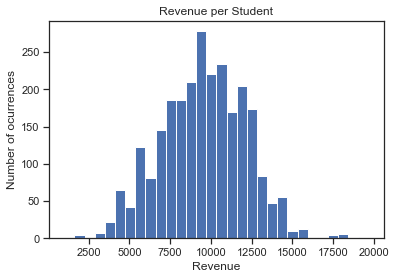

In [16]:
_ = plt.hist(test_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

In [ ]:
scatterplot1 = test_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

# PASS/FAIL Dataset - Test ID 1

In [18]:
# adding pass and fail columns 
test_ID1['Pass'] = test_ID1['Total Standard Exceeded'] + test_ID1['Total Standard Met']
test_ID1['Fail'] = test_ID1['Total Standard Nearly Met'] + test_ID1['Total Standard Not Met']

# creating a new dataframe by copying
pass_fail_df = test_ID1.copy()

# dropping columns
pass_fail_df = pass_fail_df.drop(['Total Standard Exceeded', 'Total Standard Met', 'Total Standard Nearly Met', 
               'Total Standard Not Met', 'CAASPP Reported Enrollment', 'Count Enrollment per ethnicity'], axis=1)

#rearranging columns
pass_fail_df = pass_fail_df.reindex(columns=['Agency Name', 'Subgroup ID','Revenue per student', 
                                             'Mean Scale Score', 'Students Tested',
                                             'Pass', 'Fail'])

pass_fail_df

,Agency Name,Subgroup ID,Revenue per student,Mean Scale Score,Students Tested,Pass,Fail
1319,ABC UNIFIED,Hispanic,10918.40,2516.100000,10098.0,4978.0,5118.0
3111,ABC UNIFIED,White,10918.40,2556.900000,1324.0,898.0,426.0
8478,ABC UNIFIED,Two or More Races,10918.40,2585.557143,682.0,544.0,138.0
4889,ABC UNIFIED,Asian or Pacific Islander,10918.40,2615.285714,5390.0,4718.0,672.0
7373,ABC UNIFIED,Hawaiian Native/Pacific Islander,10918.40,2543.375000,150.0,72.0,78.0
...,...,...,...,...,...,...,...
1317,YUCAIPA-CALIMESA JOINT UNIFIED,Black,9389.51,2516.920000,145.0,56.0,89.0
6265,YUCAIPA-CALIMESA JOINT UNIFIED,Asian or Pacific Islander,9389.51,2580.333333,112.0,77.0,35.0
4888,YUCAIPA-CALIMESA JOINT UNIFIED,White,9389.51,2528.800000,4886.0,2797.0,2087.0
9863,YUCAIPA-CALIMESA JOINT UNIFIED,Two or More Races,9389.51,2532.800000,54.0,24.0,30.0


In [19]:
# correlation between the variables
corr = pass_fail_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Revenue per student,Mean Scale Score,Students Tested,Pass,Fail
Revenue per student,1.000000,-0.303617,0.066613,0.020517,0.090967
Mean Scale Score,-0.303617,1.000000,-0.051440,0.035685,-0.100330
Students Tested,0.066613,-0.051440,1.000000,0.958320,0.985983
Pass,0.020517,0.035685,0.958320,1.000000,0.897219
Fail,0.090967,-0.100330,0.985983,0.897219,1.000000


### The table below contains ethinicity as columns. The values in the first table use the mean scale score. This reshape was done with pass and fail as the values in the sequence.

In [20]:
# Construct tables where each ethinicity is a column and the value is: mean scale score, pass, and fail
# run the correlation table again for each of the cases

# mean scale score as values per ethinicity
mean_score_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Mean Scale Score")
mean_score_df = mean_score_df.reset_index()
mean_score_df

Subgroup ID,Agency Name,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
0,ABC UNIFIED,10918.40,NaN,2615.285714,2520.542857,2543.375,2516.100000,2585.557143,2556.900000
1,ACALANES UNION HIGH,6853.87,NaN,2703.800000,2561.900000,NaN,2645.800000,2704.300000,2675.500000
2,ACKERMAN CHARTER,7525.60,NaN,NaN,NaN,NaN,2488.200000,NaN,2560.033333
3,ACTON-AGUA DULCE UNIFIED,2998.30,NaN,NaN,NaN,NaN,2499.928571,NaN,2534.557143
4,ADELANTO ELEMENTARY,11684.48,NaN,2551.800000,2418.814286,2530.100,2452.700000,2440.842857,2455.728571
...,...,...,...,...,...,...,...,...,...
727,YOSEMITE UNIFIED,7869.74,NaN,NaN,NaN,NaN,2478.300000,2534.950000,2514.114286
728,YREKA UNION ELEMENTARY,9839.42,2466.2,NaN,NaN,NaN,2483.800000,NaN,2507.000000
729,YREKA UNION HIGH,10782.33,NaN,NaN,NaN,NaN,2562.600000,2611.600000,2625.300000
730,YUBA CITY UNIFIED,10334.16,NaN,2521.942857,2462.283333,NaN,2478.942857,2507.042857,2518.485714


### The correlation map below is looking at MEAN SCALE SCORE as the dependent variable

In [21]:
# correlation between the variables
corr1 = mean_score_df.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1.000000,-0.239123,-0.395309,-0.404135,-0.278300,-0.233170,-0.390950,-0.282599
American Indian/Alaska Native,-0.239123,1.000000,0.619244,0.621283,0.656673,0.692269,0.684441,0.716390
Asian or Pacific Islander,-0.395309,0.619244,1.000000,0.771756,0.649170,0.794150,0.825658,0.864270
Black,-0.404135,0.621283,0.771756,1.000000,0.677613,0.796477,0.778638,0.787196
Hawaiian Native/Pacific Islander,-0.278300,0.656673,0.649170,0.677613,1.000000,0.720976,0.557734,0.566227
Hispanic,-0.233170,0.692269,0.794150,0.796477,0.720976,1.000000,0.778428,0.809320
Two or More Races,-0.390950,0.684441,0.825658,0.778638,0.557734,0.778428,1.000000,0.866568
White,-0.282599,0.716390,0.864270,0.787196,0.566227,0.809320,0.866568,1.000000


### The correlation map below is looking at PASS as the dependent variable

In [22]:
# pass as value per ethinicity
# be aware ---> we have number of students who passed and not percentage
pass_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Pass")
pass_df = pass_df.reset_index()


# correlation between the variables
corr2 = pass_df.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1.000000,0.130140,-0.133421,0.156509,0.193826,0.135638,-0.109613,-0.141204
American Indian/Alaska Native,0.130140,1.000000,0.506431,0.821838,0.743216,0.771659,0.554171,0.717729
Asian or Pacific Islander,-0.133421,0.506431,1.000000,0.411692,0.500318,0.381756,0.586546,0.485080
Black,0.156509,0.821838,0.411692,1.000000,0.892040,0.922644,0.596797,0.656703
Hawaiian Native/Pacific Islander,0.193826,0.743216,0.500318,0.892040,1.000000,0.799134,0.667716,0.732138
Hispanic,0.135638,0.771659,0.381756,0.922644,0.799134,1.000000,0.508801,0.648465
Two or More Races,-0.109613,0.554171,0.586546,0.596797,0.667716,0.508801,1.000000,0.813337
White,-0.141204,0.717729,0.485080,0.656703,0.732138,0.648465,0.813337,1.000000


### The correlation map below is looking at FAIL as the dependent variable

In [23]:
# fail as value per ethinicity
# be aware ---> we have number of students who passed and not percentage
fail_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Fail")
fail_df = fail_df.reset_index()


# correlation between the variables
corr2 = fail_df.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Pacific Islander,Black,Hawaiian Native/Pacific Islander,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1.000000,0.216139,0.053941,0.196343,0.238905,0.147438,0.081601,-0.017943
American Indian/Alaska Native,0.216139,1.000000,0.465142,0.637381,0.506139,0.468157,0.389119,0.468477
Asian or Pacific Islander,0.053941,0.465142,1.000000,0.605980,0.723985,0.485519,0.689169,0.488046
Black,0.196343,0.637381,0.605980,1.000000,0.758556,0.896638,0.654034,0.658477
Hawaiian Native/Pacific Islander,0.238905,0.506139,0.723985,0.758556,1.000000,0.612172,0.741421,0.585419
Hispanic,0.147438,0.468157,0.485519,0.896638,0.612172,1.000000,0.524536,0.653400
Two or More Races,0.081601,0.389119,0.689169,0.654034,0.741421,0.524536,1.000000,0.720480
White,-0.017943,0.468477,0.488046,0.658477,0.585419,0.653400,0.720480,1.000000


In [24]:
# Scatterplot with revenue vs pass and fail as dummy vars?

-----------

# TEST ID 1 DATASET - Split into 6 datasets based on total enrollment

## Large districts: above 60,000 total enrollment

The scatter plots take a long time to process. One way to speed up the process and visualize some relationship between
ethinicity and revenue per student is by selecting fewer racial groups. 

In [43]:
# filtering for ethiniticies of interest
#Step 1: create list of the ethiniticies of interest
list1 = ['White', 'Black', 'Hispanic']

# Step 2: filter based on the list above
test_ID1 = test_ID1[test_ID1['Subgroup ID'].isin(list1)]
test_ID1.head(5)

,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
1319,ABC UNIFIED,20722.0,10918.40,Hispanic,9425.0,2516.100000,10332.0,10098.0,1856.0,3122.0,2642.0,2476.0,4978.0,5118.0
3111,ABC UNIFIED,20722.0,10918.40,White,1302.0,2556.900000,1378.0,1324.0,436.0,462.0,248.0,178.0,898.0,426.0
1,ABC UNIFIED,20722.0,10918.40,Black,1791.0,2520.542857,1896.0,1842.0,356.0,624.0,434.0,426.0,980.0,860.0
2,ACALANES UNION HIGH,5502.0,6853.87,Black,95.0,2561.900000,50.0,48.0,10.0,12.0,10.0,16.0,22.0,26.0
1320,ACALANES UNION HIGH,5502.0,6853.87,Hispanic,508.0,2645.800000,294.0,272.0,114.0,88.0,44.0,26.0,202.0,70.0


In [25]:
# filtering based on total enrollment
large_districts_ID1 = test_ID1[test_ID1['Total Enrollment'] >= 60_000]
print(large_districts_ID1.shape)

# there are 2 school dsitricts with enrollment larger or equal to 100,000
large_districts_ID1['Agency Name'].unique()

(42, 14)


array(['ELK GROVE UNIFIED', 'FRESNO UNIFIED', 'LONG BEACH UNIFIED',
       'LOS ANGELES UNIFIED', 'SAN DIEGO UNIFIED',
       'SAN FRANCISCO UNIFIED'], dtype=object)

In [65]:
# correlation between the variables
corr2 = large_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.486950,0.415303,0.090004,0.402281,0.401616,0.485904,0.407906,0.379047,0.375544,0.439141,0.377153
Revenue per student,0.486950,1.000000,0.202232,-0.159406,0.208146,0.209232,0.179473,0.204043,0.208745,0.213590,0.199231,0.211829
Count Enrollment per ethnicity,0.415303,0.202232,1.000000,-0.110297,0.999073,0.999011,0.909602,0.996536,0.996728,0.992190,0.983661,0.994595
Mean Scale Score,0.090004,-0.159406,-0.110297,1.000000,-0.120129,-0.119319,0.153579,-0.076973,-0.152676,-0.193602,-0.004037,-0.177707
CAASPP Reported Enrollment,0.402281,0.208146,0.999073,-0.120129,1.000000,0.999993,0.908892,0.997750,0.998130,0.993192,0.984275,0.995754
Students Tested,0.401616,0.209232,0.999011,-0.119319,0.999993,1.000000,0.908722,0.997795,0.998199,0.993185,0.984251,0.995777
Total Standard Exceeded,0.485904,0.179473,0.909602,0.153579,0.908892,0.908722,1.000000,0.931682,0.883354,0.855282,0.967725,0.866811
Total Standard Met,0.407906,0.204043,0.996536,-0.076973,0.997750,0.997795,0.931682,1.000000,0.993031,0.983457,0.993160,0.987827
Total Standard Nearly Met,0.379047,0.208745,0.996728,-0.152676,0.998130,0.998199,0.883354,0.993031,1.000000,0.997342,0.972793,0.999014
Total Standard Not Met,0.375544,0.213590,0.992190,-0.193602,0.993192,0.993185,0.855282,0.983457,0.997342,1.000000,0.957130,0.999593


## Medium districts: between 30,000 and 60,000 total enrollment

In [26]:
# filtering based on size
medium_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 60_000) & (test_ID1['Total Enrollment'] >= 30_000)]
print(medium_districts_ID1.shape)

# checking number of school districts which is 8
print(medium_districts_ID1['Agency Name'].unique())

medium_districts_ID1.head(5)

(176, 14)
['ANAHEIM UNION HIGH' 'BAKERSFIELD CITY' 'CAPISTRANO UNIFIED'
 'CHULA VISTA ELEMENTARY' 'CLOVIS UNIFIED' 'CORONA-NORCO UNIFIED'
 'FONTANA UNIFIED' 'FREMONT UNIFIED' 'GARDEN GROVE UNIFIED'
 'IRVINE UNIFIED' 'KERN HIGH' 'LODI UNIFIED' 'MORENO VALLEY UNIFIED'
 'MT. DIABLO UNIFIED' 'OAKLAND UNIFIED' 'POWAY UNIFIED'
 'RIVERSIDE UNIFIED' 'SACRAMENTO CITY UNIFIED'
 'SAN BERNARDINO CITY UNIFIED' 'SAN JOSE UNIFIED' 'SAN JUAN UNIFIED'
 'SAN RAMON VALLEY UNIFIED' 'SANTA ANA UNIFIED' 'STOCKTON UNIFIED'
 'SWEETWATER UNION HIGH' 'TWIN RIVERS UNIFIED' 'WEST CONTRA COSTA UNIFIED']


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
4926,ANAHEIM UNION HIGH,30731.0,11382.87,Asian or Pacific Islander,5287.0,2648.066667,3986.0,3938.0,1907.0,1344.0,430.0,256.0,3251.0,686.0
6294,ANAHEIM UNION HIGH,30731.0,11382.87,American Indian/Alaska Native,145.0,2542.250000,189.0,179.0,21.0,58.0,50.0,50.0,79.0,100.0
35,ANAHEIM UNION HIGH,30731.0,11382.87,Black,716.0,2540.533333,720.0,704.0,92.0,210.0,176.0,224.0,302.0,400.0
3155,ANAHEIM UNION HIGH,30731.0,11382.87,White,3135.0,2570.733333,3108.0,2968.0,595.0,1062.0,659.0,651.0,1657.0,1310.0
1364,ANAHEIM UNION HIGH,30731.0,11382.87,Hispanic,20555.0,2523.366667,20432.0,19880.0,1682.0,5270.0,5410.0,7516.0,6952.0,12926.0


In [66]:
# correlation between the variables
corr2 = medium_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.096638,0.137659,-0.074754,0.123962,0.123349,0.051610,0.127887,0.128829,0.117082,0.097646,0.123160
Revenue per student,0.096638,1.000000,0.000709,-0.416709,-0.001205,-0.000584,-0.287975,-0.071950,0.099183,0.174632,-0.185651,0.145613
Count Enrollment per ethnicity,0.137659,0.000709,1.000000,-0.059278,0.985082,0.983832,0.661931,0.952772,0.947044,0.871967,0.867524,0.912146
Mean Scale Score,-0.074754,-0.416709,-0.059278,1.000000,-0.078117,-0.076966,0.316865,0.029098,-0.189628,-0.310042,0.176245,-0.264067
CAASPP Reported Enrollment,0.123962,-0.001205,0.985082,-0.078117,1.000000,0.999892,0.673897,0.966654,0.962921,0.886364,0.881336,0.927304
Students Tested,0.123349,-0.000584,0.983832,-0.076966,0.999892,1.000000,0.673782,0.966304,0.963440,0.886635,0.881081,0.927680
Total Standard Exceeded,0.051610,-0.287975,0.661931,0.316865,0.673897,0.673782,1.000000,0.763940,0.457881,0.282812,0.932472,0.357583
Total Standard Met,0.127887,-0.071950,0.952772,0.029098,0.966654,0.966304,0.763940,1.000000,0.898631,0.755271,0.945458,0.822160
Total Standard Nearly Met,0.128829,0.099183,0.947044,-0.189628,0.962921,0.963440,0.457881,0.898631,1.000000,0.955874,0.734210,0.984281
Total Standard Not Met,0.117082,0.174632,0.871967,-0.310042,0.886364,0.886635,0.282812,0.755271,0.955874,1.000000,0.565578,0.992733


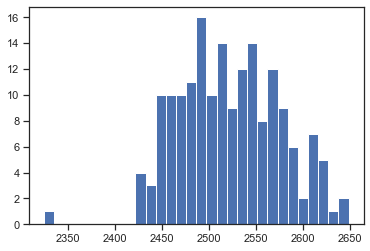

In [27]:
#medium_districts_ID1 = medium_districts_ID1[~(medium_districts_ID1['Mean Scale Score'] < 5000)]
_ = plt.hist(medium_districts_ID1['Mean Scale Score'], density=False, bins=30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

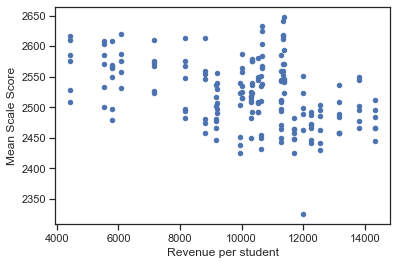

In [48]:
scatterplot1 = medium_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

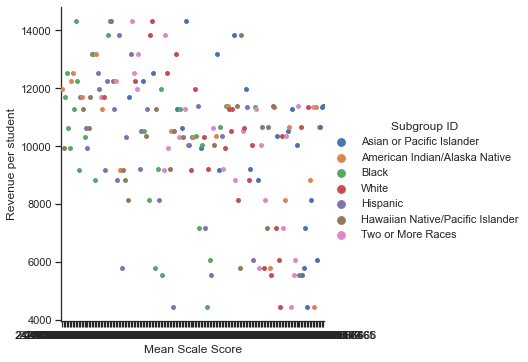

In [29]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=medium_districts_ID1)

## Small districts: between 10,000 and 30,000 total enrollment

In [30]:
small_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 30_000) & (test_ID1['Total Enrollment'] >= 10_000)]
print(small_districts_ID1.shape)


small_districts_ID1.head(5)

(711, 14)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
1319,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2516.100000,10332.0,10098.0,1856.0,3122.0,2642.0,2476.0,4978.0,5118.0
3111,ABC UNIFIED,20722.0,10918.4,White,1302.0,2556.900000,1378.0,1324.0,436.0,462.0,248.0,178.0,898.0,426.0
8478,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2585.557143,694.0,682.0,324.0,220.0,76.0,62.0,544.0,138.0
4889,ABC UNIFIED,20722.0,10918.4,Asian or Pacific Islander,7459.0,2615.285714,5476.0,5390.0,3322.0,1396.0,410.0,262.0,4718.0,672.0
7373,ABC UNIFIED,20722.0,10918.4,Hawaiian Native/Pacific Islander,158.0,2543.375000,150.0,150.0,35.0,37.0,47.0,31.0,72.0,78.0


In [67]:
# correlation between the variables
corr2 = small_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.138736,0.218978,0.033064,0.197784,0.198504,0.166171,0.215474,0.186764,0.151945,0.206124,0.168101
Revenue per student,0.138736,1.000000,0.040701,-0.317888,0.054244,0.056368,-0.172446,0.004190,0.113596,0.167303,-0.076542,0.146711
Count Enrollment per ethnicity,0.218978,0.040701,1.000000,-0.107120,0.972294,0.971572,0.682528,0.955767,0.944603,0.869868,0.889283,0.910404
Mean Scale Score,0.033064,-0.317888,-0.107120,1.000000,-0.179216,-0.181059,0.217640,-0.099737,-0.270162,-0.349421,0.039648,-0.320136
CAASPP Reported Enrollment,0.197784,0.054244,0.972294,-0.179216,1.000000,0.999880,0.688537,0.972732,0.972912,0.910614,0.902269,0.946403
Students Tested,0.198504,0.056368,0.971572,-0.181059,0.999880,1.000000,0.685324,0.972285,0.974097,0.912258,0.900525,0.947874
Total Standard Exceeded,0.166171,-0.172446,0.682528,0.217640,0.688537,0.685324,1.000000,0.770646,0.513143,0.355907,0.923219,0.425307
Total Standard Met,0.215474,0.004190,0.955767,-0.099737,0.972732,0.972285,0.770646,1.000000,0.925401,0.802487,0.956359,0.862387
Total Standard Nearly Met,0.186764,0.113596,0.944603,-0.270162,0.972912,0.974097,0.513143,0.925401,1.000000,0.956249,0.793308,0.984796
Total Standard Not Met,0.151945,0.167303,0.869868,-0.349421,0.910614,0.912258,0.355907,0.802487,0.956249,1.000000,0.647094,0.992531


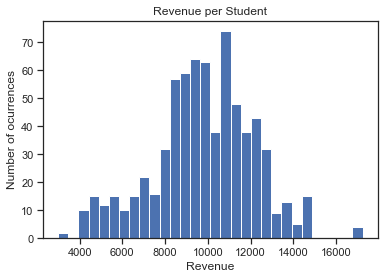

In [31]:
_ = plt.hist(small_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

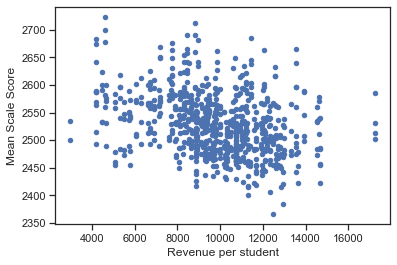

In [49]:
scatterplot = small_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Revenue per student', y='Mean Scale Score')

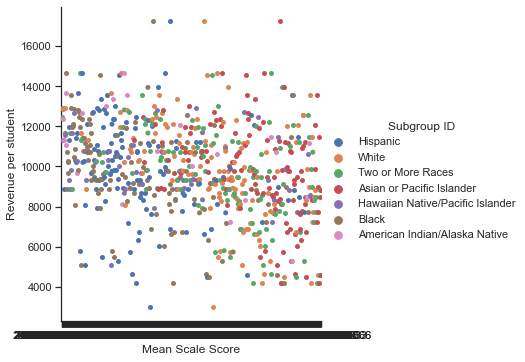

In [33]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=small_districts_ID1)

## Smaller districts: between 10,000 and 5,000 total enrollment

In [44]:
smaller_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 10_000) & (test_ID1['Total Enrollment'] >= 5_000)]
print(smaller_districts_ID1.shape)


smaller_districts_ID1.head(5)

(280, 14)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
2,ACALANES UNION HIGH,5502.0,6853.87,Black,95.0,2561.900,50.0,48.0,10.0,12.0,10.0,16.0,22.0,26.0
1320,ACALANES UNION HIGH,5502.0,6853.87,Hispanic,508.0,2645.800,294.0,272.0,114.0,88.0,44.0,26.0,202.0,70.0
3113,ACALANES UNION HIGH,5502.0,6853.87,White,3622.0,2675.500,1824.0,1718.0,920.0,522.0,186.0,90.0,1442.0,276.0
1338,ALISAL UNION,9235.0,11861.51,Hispanic,8414.0,2426.650,9662.0,9536.0,644.0,1924.0,2392.0,4575.0,2568.0,6967.0
3130,ALISAL UNION,9235.0,11861.51,White,117.0,2461.675,122.0,118.0,22.0,28.0,26.0,42.0,50.0,68.0


In [62]:
# correlation between the variables
corr1 = smaller_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.027659,0.193563,0.009006,0.160247,0.159276,0.113666,0.148446,0.149556,0.147452,0.141160,0.150350
Revenue per student,0.027659,1.000000,0.137107,-0.341444,0.166028,0.167384,-0.125835,0.098316,0.230130,0.279484,0.004142,0.262798
Count Enrollment per ethnicity,0.193563,0.137107,1.000000,-0.102663,0.937593,0.934836,0.645820,0.903636,0.908792,0.831224,0.838805,0.874884
Mean Scale Score,0.009006,-0.341444,-0.102663,1.000000,-0.236338,-0.239016,0.231970,-0.124926,-0.335513,-0.433933,0.026758,-0.398964
CAASPP Reported Enrollment,0.160247,0.166028,0.937593,-0.236338,1.000000,0.999819,0.674380,0.963225,0.975847,0.897489,0.887886,0.942387
Students Tested,0.159276,0.167384,0.934836,-0.239016,0.999819,1.000000,0.673792,0.963954,0.976509,0.897286,0.888071,0.942541
Total Standard Exceeded,0.113666,-0.125835,0.645820,0.231970,0.674380,0.673792,1.000000,0.791691,0.511848,0.305819,0.927784,0.395685
Total Standard Met,0.148446,0.098316,0.903636,-0.124926,0.963225,0.963954,0.791691,1.000000,0.912217,0.755838,0.962464,0.831234
Total Standard Nearly Met,0.149556,0.230130,0.908792,-0.335513,0.975847,0.976509,0.511848,0.912217,1.000000,0.944424,0.784527,0.980493
Total Standard Not Met,0.147452,0.279484,0.831224,-0.433933,0.897489,0.897286,0.305819,0.755838,0.944424,1.000000,0.597488,0.990614


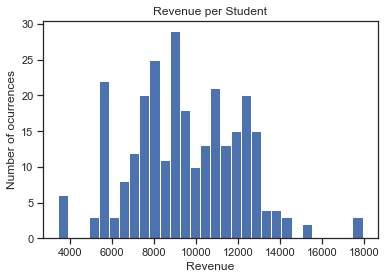

In [45]:
_ = plt.hist(smaller_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

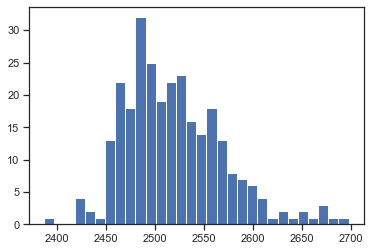

In [46]:
_ = plt.hist(smaller_districts_ID1['Mean Scale Score'], density=False, bins=30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

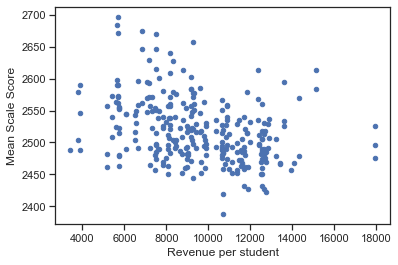

In [47]:
scatterplot = smaller_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Revenue per student', y='Mean Scale Score')

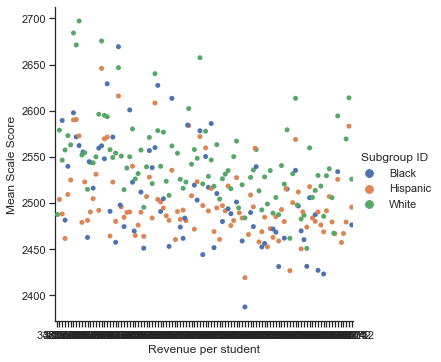

In [60]:
_ = sns.catplot(x="Revenue per student", y='Mean Scale Score', hue="Subgroup ID", kind="swarm", data=smaller_districts_ID1)

## Tiny districts: between 5,000 and 1,000 total enrollment

In [39]:
tiny_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 5_000) & (test_ID1['Total Enrollment'] >= 1000)]
print(tiny_districts_ID1.shape)


tiny_districts_ID1.head(5)

(875, 14)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
4901,ALBANY CITY UNIFIED,3702.0,15724.20,Asian or Pacific Islander,1080.0,2591.914286,1110.0,1018.0,478.0,366.0,116.0,58.0,844.0,174.0
8488,ALBANY CITY UNIFIED,3702.0,15724.20,Two or More Races,522.0,2580.300000,554.0,546.0,237.0,192.0,66.0,50.0,429.0,116.0
1333,ALBANY CITY UNIFIED,3702.0,15724.20,Hispanic,603.0,2549.028571,662.0,622.0,164.0,248.0,122.0,88.0,412.0,210.0
3124,ALBANY CITY UNIFIED,3702.0,15724.20,White,1368.0,2599.485714,1548.0,1490.0,786.0,476.0,150.0,78.0,1262.0,228.0
1344,ALPINE UNION ELEMENTARY,1745.0,7697.99,Hispanic,400.0,2497.483333,466.0,440.0,60.0,156.0,112.0,112.0,216.0,224.0


In [63]:
# correlation between the variables
corr1 = tiny_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,0.005015,0.278541,0.103987,0.231966,0.230796,0.243914,0.229785,0.180751,0.148188,0.253314,0.164000
Revenue per student,0.005015,1.000000,0.069055,-0.273818,0.103030,0.105877,-0.158556,0.042872,0.173652,0.239781,-0.057186,0.216658
Count Enrollment per ethnicity,0.278541,0.069055,1.000000,-0.073463,0.902901,0.901109,0.561644,0.857974,0.862949,0.770442,0.767149,0.821170
Mean Scale Score,0.103987,-0.273818,-0.073463,1.000000,-0.135267,-0.137341,0.320404,-0.024299,-0.277318,-0.378262,0.150411,-0.343170
CAASPP Reported Enrollment,0.231966,0.103030,0.902901,-0.135267,1.000000,0.999791,0.633274,0.954181,0.949677,0.851471,0.857600,0.905882
Students Tested,0.230796,0.105877,0.901109,-0.137341,0.999791,1.000000,0.631124,0.954222,0.950963,0.852607,0.856523,0.907098
Total Standard Exceeded,0.243914,-0.158556,0.561644,0.320404,0.633274,0.631124,1.000000,0.743372,0.376228,0.169380,0.927446,0.256989
Total Standard Met,0.229785,0.042872,0.857974,-0.024299,0.954181,0.954222,0.743372,1.000000,0.864348,0.678317,0.939569,0.765852
Total Standard Nearly Met,0.180751,0.173652,0.862949,-0.277318,0.949677,0.950963,0.376228,0.864348,1.000000,0.932610,0.675810,0.975737
Total Standard Not Met,0.148188,0.239781,0.770442,-0.378262,0.851471,0.852607,0.169380,0.678317,0.932610,1.000000,0.465930,0.988997


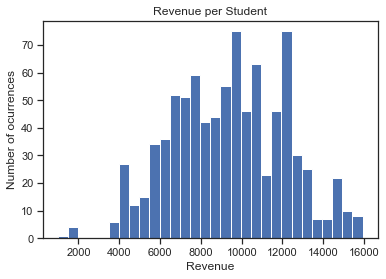

In [40]:
_ = plt.hist(tiny_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

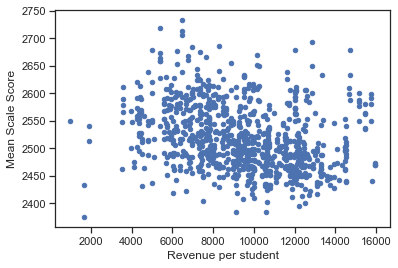

In [51]:
scatterplot1 = tiny_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [ ]:
#_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=tiny_districts_ID1)

## Mini districts: total enrollment less than 1,000

In [52]:
mini_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 1000)]
print(mini_districts_ID1.shape)

mini_districts_ID1.head(5)

(275, 14)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
1323,ACKERMAN CHARTER,586.0,7525.60,Hispanic,74.0,2488.200000,56.0,56.0,14.0,21.0,15.0,6.0,35.0,21.0
3115,ACKERMAN CHARTER,586.0,7525.60,White,460.0,2560.033333,582.0,572.0,212.0,222.0,96.0,42.0,434.0,138.0
1342,ALPAUGH UNIFIED,793.0,6331.65,Hispanic,501.0,2431.342857,332.0,326.0,6.0,50.0,80.0,190.0,56.0,270.0
1348,ALTA VISTA ELEMENTARY,555.0,12798.20,Hispanic,449.0,2424.800000,602.0,590.0,8.0,72.0,140.0,370.0,80.0,510.0
3139,ALTA VISTA ELEMENTARY,555.0,12798.20,White,76.0,2416.900000,85.0,81.0,1.0,9.0,22.0,49.0,10.0,71.0


In [64]:
# correlation between the variables
corr1 = mini_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1.000000,-0.129376,0.495220,0.096516,0.326260,0.327144,0.196034,0.319780,0.295926,0.218366,0.277362,0.258505
Revenue per student,-0.129376,1.000000,0.073964,-0.341472,0.031032,0.035942,-0.309392,-0.182925,0.108565,0.352709,-0.262698,0.272757
Count Enrollment per ethnicity,0.495220,0.073964,1.000000,0.029723,0.860190,0.857755,0.427058,0.746696,0.794966,0.684120,0.631464,0.758082
Mean Scale Score,0.096516,-0.341472,0.029723,1.000000,-0.041211,-0.045767,0.489336,0.223257,-0.220867,-0.457527,0.379548,-0.385184
CAASPP Reported Enrollment,0.326260,0.031032,0.860190,-0.041211,1.000000,0.999005,0.565765,0.883023,0.916805,0.746895,0.778787,0.846806
Students Tested,0.327144,0.035942,0.857755,-0.045767,0.999005,1.000000,0.562998,0.880727,0.917644,0.752166,0.776079,0.850575
Total Standard Exceeded,0.196034,-0.309392,0.427058,0.489336,0.565765,0.562998,1.000000,0.742077,0.258325,-0.052702,0.931138,0.066847
Total Standard Met,0.319780,-0.182925,0.746696,0.223257,0.883023,0.880727,0.742077,1.000000,0.732898,0.385759,0.935418,0.539020
Total Standard Nearly Met,0.295926,0.108565,0.794966,-0.220867,0.916805,0.917644,0.258325,0.732898,1.000000,0.821721,0.534962,0.928250
Total Standard Not Met,0.218366,0.352709,0.684120,-0.457527,0.746895,0.752166,-0.052702,0.385759,0.821721,1.000000,0.182066,0.974737


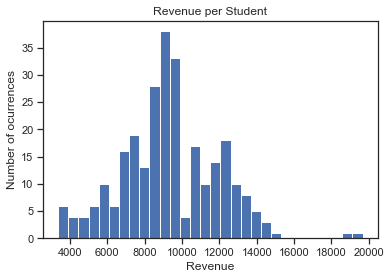

In [53]:
_ = plt.hist(mini_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

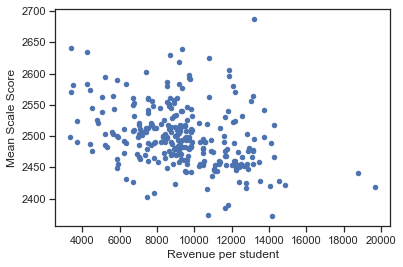

In [54]:
scatterplot1 = mini_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

---------------

# DATASET TEST ID 2

In [55]:
# Filter based on TEST ID2
list = ['2.0']
test_Id2 = df[df['Test Id'].isin(list)]
test_ID2 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Students Tested', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID2.head(5)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
1319,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2516.100000,10332.0,1856.0,3122.0,2642.0,2476.0
3111,ABC UNIFIED,20722.0,10918.4,White,1302.0,2556.900000,1378.0,436.0,462.0,248.0,178.0
8478,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2585.557143,694.0,324.0,220.0,76.0,62.0
4889,ABC UNIFIED,20722.0,10918.4,Asian or Pacific Islander,7459.0,2615.285714,5476.0,3322.0,1396.0,410.0,262.0
7373,ABC UNIFIED,20722.0,10918.4,Hawaiian Native/Pacific Islander,158.0,2543.375000,150.0,35.0,37.0,47.0,31.0


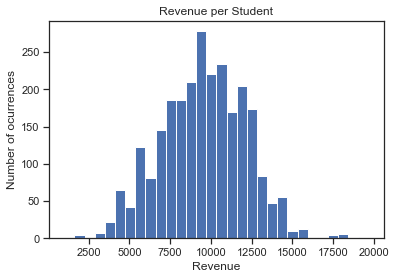

In [56]:
_ = plt.hist(test_ID2['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Revenue per student', ylabel='Mean Scale Score'>

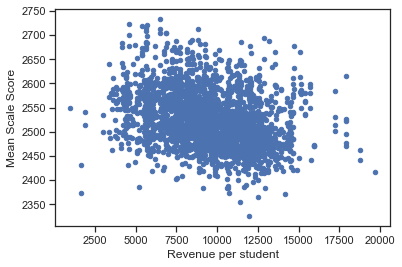

In [58]:
scatterplot1 = test_ID2[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [59]:
corr = test_ID2.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
Total Enrollment,1.000000,0.104852,0.490477,0.009453,0.474520,0.504374,0.481242,0.442389,0.429836
Revenue per student,0.104852,1.000000,0.058293,-0.303617,0.065899,-0.034613,0.051351,0.083419,0.095567
Count Enrollment per ethnicity,0.490477,0.058293,1.000000,-0.028354,0.993401,0.801800,0.981507,0.986899,0.975105
Mean Scale Score,0.009453,-0.303617,-0.028354,1.000000,-0.050826,0.133129,-0.022495,-0.084777,-0.110135
CAASPP Reported Enrollment,0.474520,0.065899,0.993401,-0.050826,1.000000,0.816405,0.991253,0.993046,0.977649
Total Standard Exceeded,0.504374,-0.034613,0.801800,0.133129,0.816405,1.000000,0.862619,0.746968,0.684396
Total Standard Met,0.481242,0.051351,0.981507,-0.022495,0.991253,0.862619,1.000000,0.976436,0.944232
Total Standard Nearly Met,0.442389,0.083419,0.986899,-0.084777,0.993046,0.746968,0.976436,1.000000,0.990540
Total Standard Not Met,0.429836,0.095567,0.975105,-0.110135,0.977649,0.684396,0.944232,0.990540,1.000000


## Conclusions (as of now):
1. The correlation between revenue per student and students' outcome seem to vary significantly according to district size.

## Observations:
1. We don't have the data overtime. It'll be hard to come to a conclusion if revenue is affecting test scores if we don't know what the test scores and revenue have been in the past.
2. Our conclusions will be based on the year we have the data for.

## NEXT STEPS:
1. Run a best fit line for each ethinicity and outcome**. It will help to better understand the relationship between revenue and test score according to each racial group.
    a. Outcome (we have outcome in different forms): mean scale score, pass, fail, and the original system (exceeded, met, nearly met and didn't meet standards).
    b. Clean up this file. Keep what is relevant. Organize the kernels to have a better flow of information.
2. Merge poverty dataset from Census?
3. Come up with more questions to investigate?